## Import Libraries

In [2]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Problem Statement

- Predict the price of a car based on its specifications (e.g., engine size, curb weight, horsepower, and fuel type). 
- This would involve cleaning the price column and handling any missing values.

## Data Gathering

In [3]:
df = pd.read_csv("autos_dataset.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
df.replace('?', np.nan, inplace=True)

In [6]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for simplicity
categorical_columns = ['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# One-hot encoding 
df = pd.get_dummies(df, columns=categorical_columns)


In [9]:
df

,symboling,normalized-losses,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-type,...,aspiration_0,aspiration_1,body-style_0,body-style_1,body-style_2,body-style_3,body-style_4,drive-wheels_0,drive-wheels_1,drive-wheels_2
0,3,NaN,two,front,88.6,168.8,64.1,48.8,2548,dohc,...,True,False,True,False,False,False,False,False,False,True
1,3,NaN,two,front,88.6,168.8,64.1,48.8,2548,dohc,...,True,False,True,False,False,False,False,False,False,True
2,1,NaN,two,front,94.5,171.2,65.5,52.4,2823,ohcv,...,True,False,False,False,True,False,False,False,False,True
3,2,164,four,front,99.8,176.6,66.2,54.3,2337,ohc,...,True,False,False,False,False,True,False,False,True,False
4,2,164,four,front,99.4,176.6,66.4,54.3,2824,ohc,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,four,front,109.1,188.8,68.9,55.5,2952,ohc,...,True,False,False,False,False,True,False,False,False,True
201,-1,95,four,front,109.1,188.8,68.8,55.5,3049,ohc,...,False,True,False,False,False,True,False,False,False,True
202,-1,95,four,front,109.1,188.8,68.9,55.5,3012,ohcv,...,True,False,False,False,False,True,False,False,False,True
203,-1,95,four,front,109.1,188.8,68.9,55.5,3217,ohc,...,False,True,False,False,False,True,False,False,False,True


#### Outliers Checking 

In [10]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in each numeric column
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"Outliers in {col}:")
    outliers = detect_outliers_iqr(df, col)
    print(outliers[col])
    print(f"Number of outliers: {outliers.shape[0]}")
    print("-" * 50)


Outliers in symboling:
Series([], Name: symboling, dtype: int64)
Number of outliers: 0
--------------------------------------------------
Outliers in wheel-base:
70    115.6
71    115.6
73    120.9
Name: wheel-base, dtype: float64
Number of outliers: 3
--------------------------------------------------
Outliers in length:
18    141.1
Name: length, dtype: float64
Number of outliers: 1
--------------------------------------------------
Outliers in width:
6      71.4
7      71.4
8      71.4
70     71.7
71     71.7
73     71.7
74     72.0
129    72.3
Name: width, dtype: float64
Number of outliers: 8
--------------------------------------------------
Outliers in height:
Series([], Name: height, dtype: float64)
Number of outliers: 0
--------------------------------------------------
Outliers in curb-weight:
Series([], Name: curb-weight, dtype: int64)
Number of outliers: 0
--------------------------------------------------
Outliers in engine-size:
15    209
16    209
17    209
47    258
48   

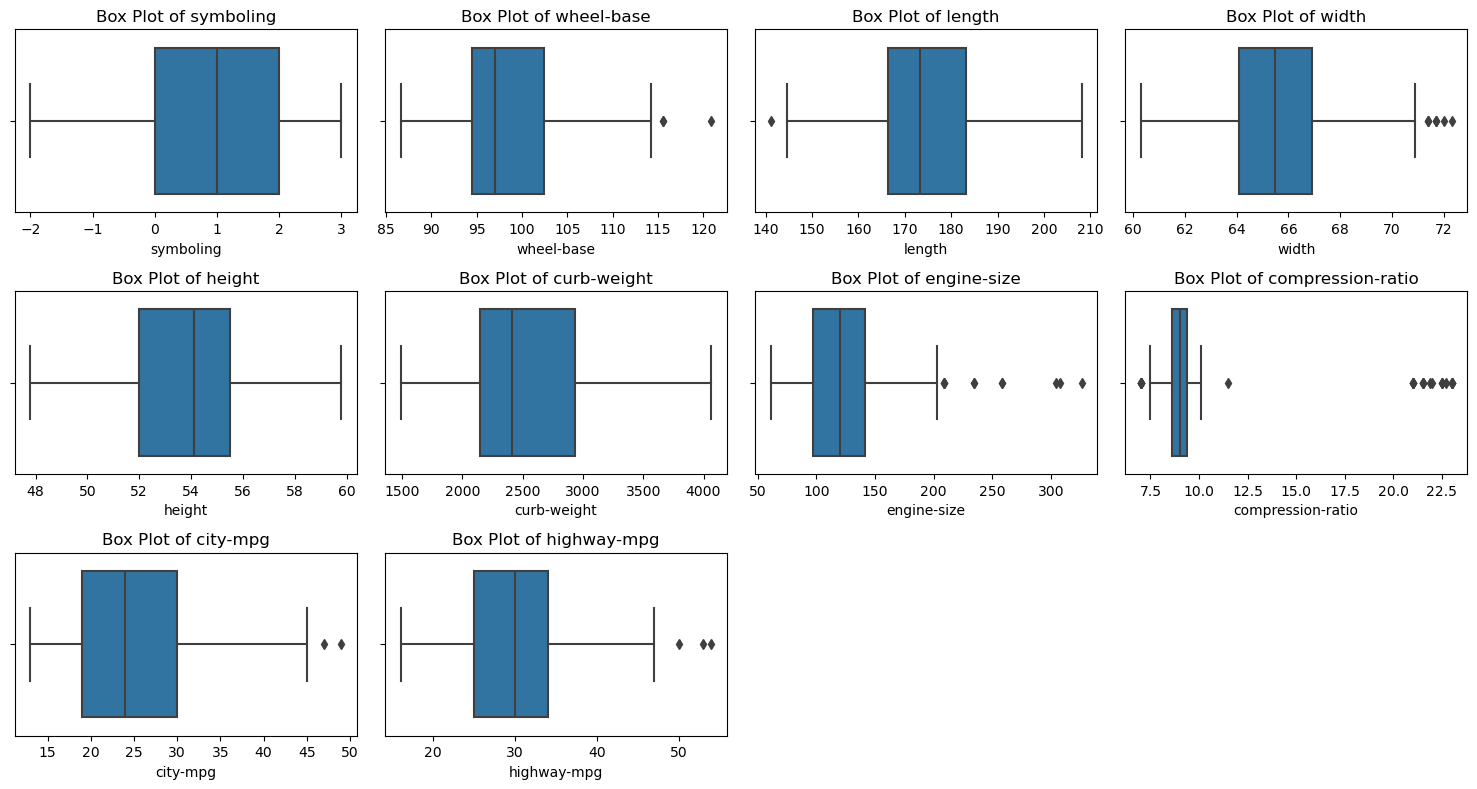

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for each numeric column
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


In [13]:
# Function to detect and impute outliers with the median
def impute_outliers_with_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Impute outliers with median
    median_value = data[column].median()
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value

# Apply the function to each numeric column
for col in df.select_dtypes(include=[np.number]).columns:
    impute_outliers_with_median(df, col)


In [14]:
# Check for remaining outliers
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"Outliers in {col} after imputation:")
    print(detect_outliers_iqr(df, col))


Outliers in symboling after imputation:
Empty DataFrame
Columns: [symboling, normalized-losses, num-of-doors, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price, make_0, make_1, make_2, make_3, make_4, make_5, make_6, make_7, make_8, make_9, make_10, make_11, make_12, make_13, make_14, make_15, make_16, make_17, make_18, make_19, make_20, make_21, fuel-type_0, fuel-type_1, aspiration_0, aspiration_1, body-style_0, body-style_1, body-style_2, body-style_3, body-style_4, drive-wheels_0, drive-wheels_1, drive-wheels_2]
Index: []

[0 rows x 55 columns]
Outliers in wheel-base after imputation:
    symboling normalized-losses num-of-doors engine-location  wheel-base  \
17          0               NaN         four           front       110.0   
67         -1                93         four           front       110.0   
68         -1        

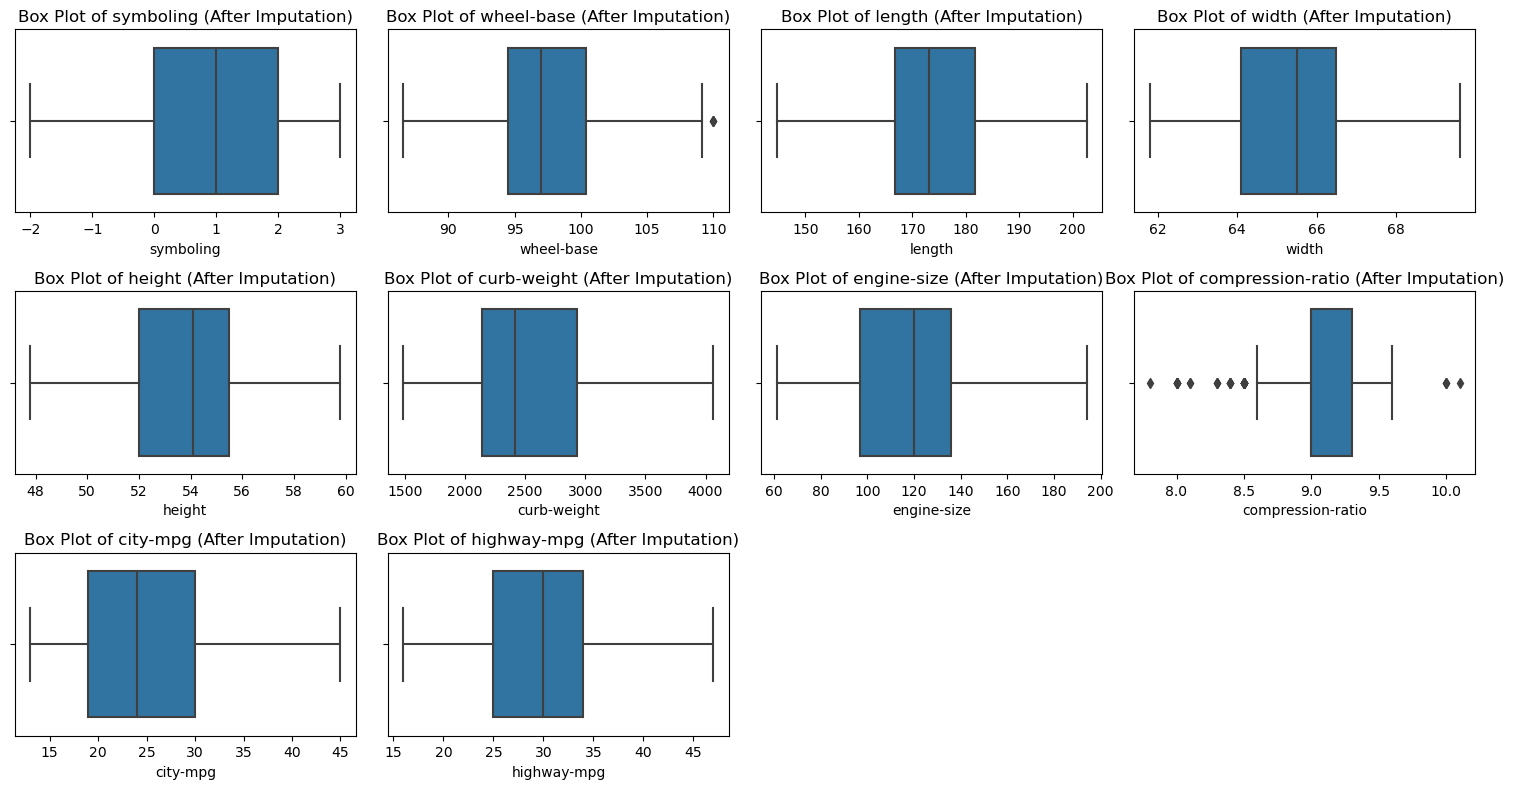

In [15]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col} (After Imputation)')
plt.tight_layout()
plt.show()


In [16]:
df

,symboling,normalized-losses,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,engine-type,...,aspiration_0,aspiration_1,body-style_0,body-style_1,body-style_2,body-style_3,body-style_4,drive-wheels_0,drive-wheels_1,drive-wheels_2
0,3,NaN,two,front,88.6,168.8,64.1,48.8,2548,dohc,...,True,False,True,False,False,False,False,False,False,True
1,3,NaN,two,front,88.6,168.8,64.1,48.8,2548,dohc,...,True,False,True,False,False,False,False,False,False,True
2,1,NaN,two,front,94.5,171.2,65.5,52.4,2823,ohcv,...,True,False,False,False,True,False,False,False,False,True
3,2,164,four,front,99.8,176.6,66.2,54.3,2337,ohc,...,True,False,False,False,False,True,False,False,True,False
4,2,164,four,front,99.4,176.6,66.4,54.3,2824,ohc,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,four,front,109.1,188.8,68.9,55.5,2952,ohc,...,True,False,False,False,False,True,False,False,False,True
201,-1,95,four,front,109.1,188.8,68.8,55.5,3049,ohc,...,False,True,False,False,False,True,False,False,False,True
202,-1,95,four,front,109.1,188.8,68.9,55.5,3012,ohcv,...,True,False,False,False,False,True,False,False,False,True
203,-1,95,four,front,109.1,188.8,68.9,55.5,3217,ohc,...,False,True,False,False,False,True,False,False,False,True


In [20]:
print(df.dtypes)



symboling              int64
normalized-losses     object
num-of-doors          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
make_0                  bool
make_1                  bool
make_2                  bool
make_3                  bool
make_4                  bool
make_5                  bool
make_6                  bool
make_7                  bool
make_8                  bool
make_9                  bool
make_10                 bool
make_11                 bool
make_12                 bool
make_13       

In [21]:
data_encoded = pd.get_dummies(df, drop_first=True)


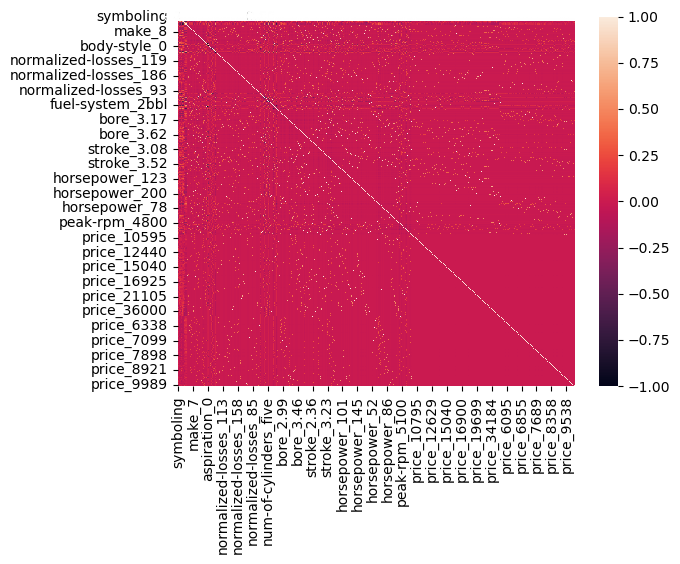

In [22]:
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [27]:
df.value_counts('num-of-doors')

num-of-doors
four    114
two      89
Name: count, dtype: int64

In [28]:
df['num-of-doors'] = df['num-of-doors'].replace({'two': 2, 'three': 3, 'four':4})


In [29]:
data = pd.get_dummies(df, drop_first=True)


In [31]:
df = pd.get_dummies(df, drop_first=True)

In [32]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
data_reduced = selector.fit_transform(df)


In [34]:
# Check column names and sample data
print(df.columns)  # Lists all columns
print(df.head())   # Shows the first few rows


Index(['symboling', 'num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       ...
       'price_9538', 'price_9549', 'price_9639', 'price_9895', 'price_9959',
       'price_9960', 'price_9980', 'price_9988', 'price_9989', 'price_9995'],
      dtype='object', length=452)
   symboling  num-of-doors  wheel-base  length  width  height  curb-weight  \
0          3           2.0        88.6   168.8   64.1    48.8         2548   
1          3           2.0        88.6   168.8   64.1    48.8         2548   
2          1           2.0        94.5   171.2   65.5    52.4         2823   
3          2           4.0        99.8   176.6   66.2    54.3         2337   
4          2           4.0        99.4   176.6   66.4    54.3         2824   

   engine-size  compression-ratio  city-mpg  ...  price_9538  price_9549  \
0          130                9.0        21  ...       False       False   
1          130                

In [36]:
# Step 1: Select all columns that start with "price_"
price_columns = [col for col in df.columns if col.startswith("price_")]

# Step 2: Create a new target column by finding the highest price category with True, with a default value for rows with no True
df['target_price'] = df[price_columns].apply(
    lambda row: max([int(col.split('_')[1]) for col in price_columns if row[col]] or [-1]), 
    axis=1
)

# Step 3: Check the distribution of the new target column
print(df['target_price'].value_counts())

# Step 4: Drop the individual price columns if the new target is satisfactory
df = df.drop(columns=price_columns)

# Now 'target_price' can serve as the target column
X = df.drop(columns=['target_price'])
y = df['target_price']


target_price
-1        5
 8921     2
 18150    2
 7898     2
 7775     2
         ..
 45400    1
 16503    1
 5389     1
 6189     1
 22625    1
Name: count, Length: 186, dtype: int64


In [43]:
df

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,...,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5750,peak-rpm_5800,peak-rpm_5900,peak-rpm_6000,peak-rpm_6600,target_price
0,3,2.0,88.6,168.8,64.1,48.8,2548,130,9.0,21,...,False,False,False,False,False,False,False,False,False,13495
1,3,2.0,88.6,168.8,64.1,48.8,2548,130,9.0,21,...,False,False,False,False,False,False,False,False,False,16500
2,1,2.0,94.5,171.2,65.5,52.4,2823,152,9.0,19,...,False,False,False,False,False,False,False,False,False,16500
3,2,4.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,...,False,False,True,False,False,False,False,False,False,13950
4,2,4.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,...,False,False,True,False,False,False,False,False,False,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.0,109.1,188.8,68.9,55.5,2952,141,9.5,23,...,False,True,False,False,False,False,False,False,False,16845
201,-1,4.0,109.1,188.8,68.8,55.5,3049,141,8.7,19,...,True,False,False,False,False,False,False,False,False,19045
202,-1,4.0,109.1,188.8,68.9,55.5,3012,173,8.8,18,...,False,False,True,False,False,False,False,False,False,21485
203,-1,4.0,109.1,188.8,68.9,55.5,3217,145,9.0,26,...,False,False,False,False,False,False,False,False,False,22470


In [44]:
print(df.columns)


Index(['symboling', 'num-of-doors', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg',
       ...
       'peak-rpm_5300', 'peak-rpm_5400', 'peak-rpm_5500', 'peak-rpm_5600',
       'peak-rpm_5750', 'peak-rpm_5800', 'peak-rpm_5900', 'peak-rpm_6000',
       'peak-rpm_6600', 'target_price'],
      dtype='object', length=268)


In [49]:
print(X.isnull().sum())  # Check how many NaNs in each column


symboling        0
num-of-doors     2
wheel-base       0
length           0
width            0
                ..
peak-rpm_5750    0
peak-rpm_5800    0
peak-rpm_5900    0
peak-rpm_6000    0
peak-rpm_6600    0
Length: 267, dtype: int64


In [54]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Check if there are still any missing values
print(pd.DataFrame(X_imputed).isnull().sum())


0      0
1      0
2      0
3      0
4      0
      ..
262    0
263    0
264    0
265    0
266    0
Length: 267, dtype: int64


In [55]:
best_features = SelectKBest(score_func=f_regression, k=10)
X_selected = best_features.fit_transform(X_imputed, y)


In [53]:
# Check for NaN values in the feature matrix X
print(X.isnull().sum())


symboling        0
num-of-doors     2
wheel-base       0
length           0
width            0
                ..
peak-rpm_5750    0
peak-rpm_5800    0
peak-rpm_5900    0
peak-rpm_6000    0
peak-rpm_6600    0
Length: 267, dtype: int64


In [57]:
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()  # Impute y if needed


In [58]:
# Ensure all columns in X are numeric
print(X.dtypes)

# If necessary, convert columns to numeric, forcing errors to NaN (if any)
X = X.apply(pd.to_numeric, errors='coerce')


symboling          int64
num-of-doors     float64
wheel-base       float64
length           float64
width            float64
                  ...   
peak-rpm_5750       bool
peak-rpm_5800       bool
peak-rpm_5900       bool
peak-rpm_6000       bool
peak-rpm_6600       bool
Length: 267, dtype: object


In [59]:
from sklearn.feature_selection import SelectKBest, f_regression

# Apply SelectKBest to select the top 10 features
best_features = SelectKBest(score_func=f_regression, k=10)
X_selected = best_features.fit_transform(X_imputed, y_imputed)


In [60]:
# Get the boolean mask of selected features
selected_mask = best_features.get_support()

# Display the selected feature names
selected_features = X.columns[selected_mask]
print("Selected Features:", selected_features)


Selected Features: Index(['length', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg',
       'make_9', 'drive-wheels_1', 'drive-wheels_2', 'num-of-cylinders_four',
       'num-of-cylinders_six'],
      dtype='object')


In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [62]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

### freature Selection

In [64]:
features = ['length','curb-weight','engine-size','city-mpg', 'highway-mpg',
       'make_9', 'drive-wheels_1', 'drive-wheels_2', 'num-of-cylinders_four',
       'num-of-cylinders_six' ]
target = 'target_price'
X = df[features]
y = df[target]

In [65]:
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='median')
X_imputed = numeric_imputer.fit_transform(X)
y_imputed = SimpleImputer(strategy='median').fit_transform(y.values.reshape(-1, 1)).ravel()


### Split the data into train and test

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)


In [68]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (164, 10)
X_test shape: (41, 10)
y_train shape: (164,)
y_test shape: (41,)


In [69]:
X_train

array([[1.750e+02, 2.700e+03, 1.340e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.867e+02, 3.075e+03, 1.200e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.697e+02, 2.280e+03, 9.200e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.653e+02, 1.938e+03, 9.700e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.835e+02, 3.016e+03, 1.710e+02, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.846e+02, 3.296e+03, 1.810e+02, ..., 0.000e+00, 0.000e+00,
        1.000e+00]])

In [70]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [80]:
# Testing Dataset
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print("R Squared :",r2)

MSE : 24087240.420788135
RMSE : 4907.875346908083
MAE : 3158.8306760226865
R Squared : 0.7329809867495554


In [81]:
# training Data Set
y_pred_train = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R Squared :",r2)

MSE : 14434668.829949275
RMSE : 3799.2984654998186
MAE : 2383.4422120347695
R Squared : 0.7577358737814106


### For increasing model accuracy use regularization , hyperparameter tunning

In [73]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}
# Ridge Regression with Grid Search
ridge = Ridge()
ridge_cv = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='r2')

In [74]:
# Best Ridge model
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

In [75]:
# Lasso Regression with Grid Search
lasso = Lasso()
lasso_cv = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', cv=5)
lasso_cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='r2')

In [76]:
best_lasso = lasso_cv.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)


In [77]:
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

In [78]:
# Display results
print("Ridge Regression:")
print("Best alpha:", best_ridge.alpha)
print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)

print("\nLasso Regression:")
print("Best alpha:", best_lasso.alpha)
print("Mean Squared Error:", lasso_mse)
print("R-squared:", lasso_r2)

Ridge Regression:
Best alpha: 1
Mean Squared Error: 24780016.565539382
R-squared: 0.7253012193979047

Lasso Regression:
Best alpha: 10
Mean Squared Error: 24521777.962009102
R-squared: 0.7281639224677973


# Testing on Single Row

In [83]:
column_names = X.columns
len(column_names)

10

In [84]:
column_names

Index(['length', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg',
       'make_9', 'drive-wheels_1', 'drive-wheels_2', 'num-of-cylinders_four',
       'num-of-cylinders_six'],
      dtype='object')

In [85]:
X.head(1).T

,0
length,168.8
curb-weight,2548
engine-size,130
city-mpg,21
highway-mpg,27
make_9,False
drive-wheels_1,False
drive-wheels_2,True
num-of-cylinders_four,True
num-of-cylinders_six,False


In [107]:
with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model has been saved to 'trained_model.pkl'.")

Model has been saved to 'trained_model.pkl'.


In [108]:
with open('trained_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)


In [111]:
import json

# Load the JSON file containing metadata
with open('model_metadata.json', 'r') as f:
    model_metadata = json.load(f)

# Access the list of features and target from the metadata
features = model_metadata['features']
target = model_metadata['target']

print(f"Features: {features}")
print(f"Target: {target}")


Features: ['length', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg', 'make_9', 'drive-wheels_1', 'drive-wheels_2', 'num-of-cylinders_four', 'num-of-cylinders_six']
Target: target_price


In [112]:
len(model_metadata['features'])

10

In [98]:
df.info

<bound method DataFrame.info of      symboling  num-of-doors  wheel-base  length  width  height  curb-weight  \
0            3           2.0        88.6   168.8   64.1    48.8         2548   
1            3           2.0        88.6   168.8   64.1    48.8         2548   
2            1           2.0        94.5   171.2   65.5    52.4         2823   
3            2           4.0        99.8   176.6   66.2    54.3         2337   
4            2           4.0        99.4   176.6   66.4    54.3         2824   
..         ...           ...         ...     ...    ...     ...          ...   
200         -1           4.0       109.1   188.8   68.9    55.5         2952   
201         -1           4.0       109.1   188.8   68.8    55.5         3049   
202         -1           4.0       109.1   188.8   68.9    55.5         3012   
203         -1           4.0       109.1   188.8   68.9    55.5         3217   
204         -1           4.0       109.1   188.8   68.9    55.5         3062   

     en